<a href="https://colab.research.google.com/github/ent-r/SEC202/blob/master/Threat_Modeling_Projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

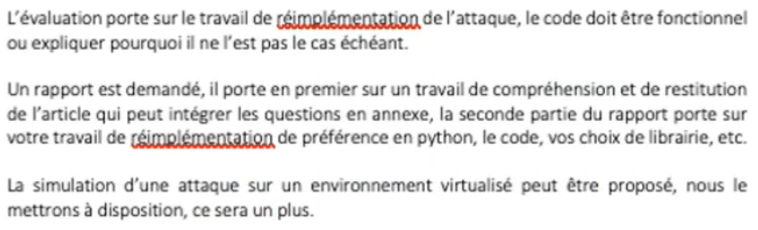

# L'attaque et une implémentation de cette attaque

Dans le document *Risk Analysis of Water Grid Systems Using Threat Modeling*, l'attaque et une implémentation de cette attaque sont abordées dans plusieurs sections. Le document ne se contente pas de mentionner les menaces mais décrit également le processus pour les évaluer et propose des contre-mesures pour atténuer les risques associés.

## Évocation d'une attaque

La section *3.1. Identification of assets* met en évidence l'importance de l'identification des actifs comme cibles principales des attaques. Elle explique que les actifs sont des composants précieux au sein d'un système que les attaquants peuvent viser. Il peut s'agir de matériel, de logiciels, de réseaux et d'autres éléments, et elle souligne que les actifs dans un environnement peuvent évoluer dynamiquement, nécessitant des mesures de sécurité adaptatives.

La section *3.2. Identification of access points of device* traite des interfaces diverses que les attaquants pourraient exploiter pour obtenir des privilèges non autorisés. Il est question des ports matériels, des écrans de connexion, des interfaces utilisateur, des sockets ouverts et des fichiers de configuration comme des points d'accès où les attaques pourraient être réalisées. La définition des frontières de confiance pour ces points d'accès est cruciale, car elle détermine le niveau de confiance nécessaire pour accéder à certaines parties du système.


## Implémentation de cette attaque

Dans la section *3.3. Classification of threats*, l'utilisation de la méthode de modélisation des menaces STRIDE et des outils comme l'outil de modélisation des menaces de Microsoft est mise en avant pour identifier et classer les risques. Le document montre que cette méthode permet d'identifier des menaces comme le *Spoofing*, la *Tampering*, le *Repudiation*, la *Information Disclosure*, le *Denial of Service*, et l'*Elevation of Privilege*.

Après l'identification des menaces dans la section *3.4. Rating of identified threats*, le modèle de classification de risques DREAD est utilisé pour évaluer et hiérarchiser ces menaces en fonction de leur gravité, de leur reproductibilité, de la facilité d'exploitation, du nombre d'utilisateurs affectés et de la manière dont les failles du système peuvent être exploitées. Les résultats de cette évaluation sont utilisés pour prioriser les contrôles de sécurité nécessaires pour atténuer chaque menace .

La section *3.5. Proposing countermeasures to mitigate threats* propose des solutions spécifiques pour atténuer les menaces identifiées, en fonction des évaluations réalisées dans les sections précédentes. Elle explique comment ces contre-mesures peuvent être appliquées en fonction des niveaux de risque et des priorités établies pour chaque menace.

# Water Grid Systems et Smart Grid

Il ne s'agit pas directement d'un smart grid dans le contexte donné. Le texte discute de la modélisation des menaces et de l'analyse des risques pour les systèmes de réseau d'eau, ce qui est différent de la notion de "smart grid".

Un **smart grid** fait référence à un réseau électrique avancé qui intègre des technologies de l'information et des communications pour améliorer la fiabilité, l'efficacité et la durabilité de la production, du transport et de la distribution d'électricité. Les smart grids permettent une gestion optimisée de la consommation d'énergie, une meilleure intégration des énergies renouvelables, et une meilleure résilience face aux perturbations.

En revanche, l'analyse des risques dans le secteur de l'eau, telle que discutée dans le texte, se concentre sur les menaces spécifiques aux systèmes de réseau d'eau, notamment les cyberattaques qui pourraient perturber la distribution d'eau potable, la gestion des ressources, et les infrastructures critiques. Cela inclut des considérations sur la sécurité des systèmes SCADA (Supervisory Control and Data Acquisition), mais sans l'intégration des capacités interactives et de communication typiques des smart grids.

Ainsi, bien que les concepts de cybersécurité et de modélisation des menaces soient similaires entre les deux systèmes (réseau d'eau et smart grid), ils ne se recoupent pas directement en termes de technologie ou de finalités.

# Objectif de l'article

L'objectif du document est d'analyser les menaces pesant sur les systèmes de gestion des réseaux d'eau (Water Grid Systems, WGS) en utilisant une **modélisation des menaces** pour identifier, classer et évaluer les risques liés à ces systèmes critiques, tout en proposant des mesures d'atténuation adaptées. Il met l'accent sur les risques croissants de cyberattaques ciblant les infrastructures critiques de l'eau, dues notamment à l'intégration de technologies opérationnelles (OT) et informatiques (IT).

Le document applique les **méthodologies STRIDE et DREAD** pour évaluer les menaces spécifiques au WGS, et propose des recommandations pour renforcer la sécurité et minimiser l'impact des attaques, telles que le sabotage, le déni de service ou la falsification de données.

# Méthodologie

Le document décrit **une méthodologie de modélisation des menaces appliquée aux systèmes d'objets connectés** (IoT), en particulier un système de gestion de l'eau (WGS). L'objectif principal est **d'identifier et de gérer les risques de sécurité dans l'architecture d'un système IoT**.

Les étapes clés de la méthodologie exposée sont:

* Identification des actifs critiques du système : les composants matériels, logiciels et les utilisateurs qui pourraient être ciblés par des attaques.

* Identification des points d'accès : les interfaces ou portes d'entrée potentielles pour les attaquants, comme les ports matériels ou les interfaces utilisateur.

* Classification des menaces : utilisation de la méthode STRIDE pour catégoriser les menaces selon six types principaux (usurpation, altération, répudiation, divulgation d'informations, déni de service, et élévation de privilèges).

* Évaluation des menaces : application du modèle DREAD pour prioriser les risques en fonction de critères tels que les dommages potentiels, la facilité d'exploitation et l'impact.

* Proposition de contre-mesures : conception de solutions pour atténuer les menaces identifiées, en donnant la priorité aux risques les plus critiques.

Le document illustre ces concepts à travers un exemple pratique sur un système de gestion de l'eau, mettant en évidence la structure en couches du système, les zones de confiance et les vulnérabilités potentielles. **Le but final est de fournir des stratégies de sécurité proactives** pour protéger les systèmes IoT contre les cyberattaques et garantir leur fonctionnement sécurisé et fiable.

Programme Python interactif qui guide l'utilisateur à travers une méthodologie de modélisation des menaces appliquée aux systèmes d'objets connectés. Il interroge l'utilisateur à chaque étape, enregistre les réponses dans un fichier, puis génère un document final contenant toutes les informations collectées.

### Code Python


In [ ]:
import json
import os

def ask_question(prompt):
    """Fonction pour interroger l'utilisateur avec une question."""
    response = input(f"{prompt}\n> ")
    return response

def save_progress(data, filename="progress.json"):
    """Enregistre les données dans un fichier JSON."""
    with open(filename, 'w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False, indent=4)

def generate_final_doc(data, output_file="final_document.txt"):
    """Génère un document final à partir des données collectées."""
    with open(output_file, 'w', encoding='utf-8') as f:
        f.write("Méthodologie de Modélisation des Menaces pour les Systèmes d'Objets Connectés\n\n")

        f.write("1. Identification des actifs critiques :\n")
        f.write(data.get("assets", "Non renseigné") + "\n\n")

        f.write("2. Identification des points d'accès :\n")
        f.write(data.get("access_points", "Non renseigné") + "\n\n")

        f.write("3. Classification des menaces (STRIDE) :\n")
        f.write(data.get("stride", "Non renseigné") + "\n\n")

        f.write("4. Évaluation des menaces (DREAD) :\n")
        f.write(data.get("dread", "Non renseigné") + "\n\n")

        f.write("5. Proposition de contre-mesures :\n")
        f.write(data.get("countermeasures", "Non renseigné") + "\n\n")

    print(f"Document final généré : {output_file}")

def main():
    # Vérifie si un fichier de progression existe déjà
    progress_file = "progress.json"
    data = {}
    if os.path.exists(progress_file):
        with open(progress_file, 'r', encoding='utf-8') as f:
            data = json.load(f)

    # Étape 1 : Identification des actifs critiques
    if "assets" not in data:
        data["assets"] = ask_question("1. Identifier les actifs critiques (composants matériels, logiciels, utilisateurs, etc.) :")
        save_progress(data)

    # Étape 2 : Identification des points d'accès
    if "access_points" not in data:
        data["access_points"] = ask_question("2. Identifier les points d'accès potentiels (ports matériels, interfaces utilisateur, etc.) :")
        save_progress(data)

    # Étape 3 : Classification des menaces (STRIDE)
    if "stride" not in data:
        data["stride"] = ask_question("3. Catégoriser les menaces selon STRIDE (usurpation, altération, répudiation, etc.) :")
        save_progress(data)

    # Étape 4 : Évaluation des menaces (DREAD)
    if "dread" not in data:
        data["dread"] = ask_question("4. Évaluer les menaces en utilisant DREAD (dommages potentiels, exploitabilité, impact, etc.) :")
        save_progress(data)

    # Étape 5 : Proposition de contre-mesures
    if "countermeasures" not in data:
        data["countermeasures"] = ask_question("5. Proposer des contre-mesures pour atténuer les menaces les plus critiques :")
        save_progress(data)

    # Génération du document final
    generate_final_doc(data)

if __name__ == "__main__":
    main()

KeyboardInterrupt: Interrupted by user

### Fonctionnement
1. **Étapes interactives** : À chaque étape, le programme pose une question pertinente et enregistre la réponse.
2. **Sauvegarde incrémentale** : Si l'utilisateur interrompt le programme, il peut reprendre là où il s'était arrêté grâce au fichier `progress.json`.
3. **Génération du document final** : Une fois toutes les étapes terminées, un fichier texte est créé contenant toutes les réponses structurées.

### Fichiers générés
- **progress.json** : Contient les réponses sauvegardées pendant l'interaction.
- **final_document.txt** : Document final prêt à être utilisé.

L'approche garantit une expérience interactive tout en préservant les données de progression.

Les étapes décrites dans le document (comme l'utilisation de **STRIDE-per-element** et la création de **diagrammes de flux de données**) pourraient être traduites en outils ou scripts automatisés pour faciliter la mise en œuvre de la méthodologie. Par ailleurs, des schémas explicatifs sont fournis pour illustrer les processus.

### Implémentation pratique

*	Traduire les étapes en outils spécifiques (par exemple, des scripts pour analyser les DFD).
*	Automatiser les procédures décrites (comme l'élaboration de taxonomies d'attaques ou l'application des catégories STRIDE).
*	S'appuyer sur des outils de modélisation, **NetworkX** par exemple, et les adapter aux spécificités des CPS.


Le **cas d’étude** sert à valider la méthodologie proposée et peut inspirer une implémentation réelle.

## Eléments technologiques clés

Le document propose une **méthodologie** technologique adaptable et modulaire pour les **systèmes cyber-physiques**, qui pourrait être intégrée dans des outils de modélisation assistée par ordinateur ou des solutions d'analyse des menaces.

### Modélisation des menaces basée sur STRIDE

*	Approche STRIDE-per-element pour analyser chaque composant des diagrammes de flux de données (DFD).
*	STRIDE est utilisé pour identifier les catégories de menaces : Spoofing, Tampering, Repudiation, Information Disclosure, Denial of Service, Elevation of Privilege.
*	Optimisation proposée : ignorer les flux internes aux zones de confiance pour réduire le nombre de menaces à évaluer.

### Diagrammes de flux de données (DFD)

*	Identification des flux de données, des processus, des entités, et des magasins de données dans un système cyber-physique (CPS).
*	Inclusion des composants physiques et des flux analogiques pour mieux refléter les interactions dans les CPS.

### Taxonomie des attaques

*	Création d’une taxonomie initiale des attaques à partir d’une revue de la littérature.
*	Actualisation dynamique de la taxonomie basée sur les nouvelles menaces identifiées.

### Gestion des frontières de confiance (Trust Boundaries)

*	Définition des zones de confiance et documentation des hypothèses de sécurité.
*	Utilisation pour guider l'analyse des menaces à travers les frontières de confiance.

### Priorisation des menaces et exigences de sécurité

*	Évaluation des conséquences et des pertes potentielles associées aux menaces identifiées.
*	Classement des menaces par priorité pour orienter les choix des contre-mesures et des exigences de sécurité.

### Procédure d’élaboration des menaces (Threat Elicitation)

*	Processus systématique intégrant :
1.	Sélection des éléments DFD.
2.	Identification des actifs d’information associés.
3.	Application des catégories STRIDE.
4.	Utilisation de la taxonomie des attaques pour associer des types d'attaques spécifiques.

*	Possibilité d’automatisation pour générer des modèles de menaces par défaut.

### Outils collaboratifs et pluridisciplinaires

*	Implication des experts en cybersécurité, des architectes systèmes, et des propriétaires du système dans toutes les étapes clés.

### Applications spécifiques aux CPS

*	Adaptations pour les systèmes complexes comme les microgrid, avec des considérations spécifiques pour :
1.	Les informations en temps réel vs non temps réel.
2.	L'intégration de données externes (par ex., prévisions météorologiques ou prix de l'énergie).



## Implémentation des Concepts du Document

Implémenter les concepts décrits dans le document.

**Identification des Actifs**

Identifier les actifs critiques du système. Cela peut inclure des composants matériels, des logiciels, des réseaux, des capteurs, des contrôleurs, etc.

**Identification des Points d'Accès**

Identifier les points d'accès au système, tels que les ports matériels, les interfaces utilisateur, les sockets ouverts, et les fichiers de configuration.

**Classification des Menaces**

Utiliser la méthodologie STRIDE pour classer les menaces potentielles. STRIDE couvre les catégories suivantes :

* spoofing (Usurpation d'identité)
* tampering (Altération)
* repudiation (Répudiation)
* information Disclosure (Divulgation d'informations)
* denial of Service (Déni de service)
* elevation of Privilege (Élévation des privilèges)

**Évaluation des Risques**

Utiliser le modèle DREAD pour évaluer les risques associés à chaque menace. DREAD couvre les aspects suivants :

* damage (Dommages)
* reproducibility (Reproductibilité)
* exploitability (Exploitabilité)
* affected Users (Utilisateurs affectés)
* discoverability (Détectabilité)

**Proposition de Contre-Mesures**

Développer des contre-mesures pour atténuer les risques identifiés. Cela peut inclure des mesures de sécurité telles que l'authentification, le durcissement des applications, la journalisation, la ségrégation, le chiffrement, et la redondance.



## Méthodologie

La méthodologie présentée dans l'article comprend neuf étapes clés pour modéliser les menaces sur un système donné, comme les dispositifs IoT ou, dans ce cas, un système de gestion d'eau (WGS).

###### Les étapes et leur application détaillée au cas concret du WGS

#### Identification des actifs

Cette étape consiste à identifier les éléments de valeur dans le système susceptibles d'être attaqués. Dans le cas du WGS, ces actifs incluent des composants matériels et logiciels (capteurs, contrôleurs logiques programmables, interfaces homme-machine, etc.), les réseaux, les sources d'énergie, et les différents utilisateurs interagissant avec le système. Chaque actif est analysé pour comprendre son rôle et sa vulnérabilité potentielle.

#### Identification des points d'accès

On identifie les interfaces susceptibles d’être utilisées par des attaquants pour obtenir un accès non autorisé aux actifs. Pour le WGS, ces points incluent les ports matériels, les interfaces utilisateur, les fichiers de configuration, et les connexions réseau. La définition de ces points d'accès permet aussi d'établir des frontières de confiance dans le système.

#### Classification des menaces

Les menaces sont classées en utilisant la méthodologie STRIDE, qui couvre le spoofing, le tampering, la repudiation, la divulgation d'informations, le déni de service, et l'élévation de privilèges. Pour le WGS, **154 menaces** ont été identifiées, réparties entre ces catégories. Par exemple, une menace de déni de service pourrait viser à rendre des capteurs inaccessibles.

#### Évaluation des menaces identifiées

Les menaces sont évaluées à l'aide du modèle DREAD, qui calcule un score basé sur les dommages potentiels, la reproductibilité, la facilité d'exploitation, l'impact sur les utilisateurs, et la détectabilité. Ces scores sont ensuite utilisés pour hiérarchiser les menaces selon leur gravité. Par exemple, une attaque entraînant un dysfonctionnement des pompes d'eau pourrait avoir un score élevé.

#### Proposition de contre-mesures

Les contre-mesures sont proposées pour atténuer les menaces identifiées, en priorisant celles avec les scores de risque les plus élevés. Dans le cas du WGS, cela inclut l'authentification stricte, la surveillance des accès physiques, et des pare-feux pour protéger les communications réseau.

#### Analyse de risque basée sur l’architecture WGS

En analysant l'architecture du WGS, les zones de confiance ont été définies sur plusieurs couches, de la couche physique (pompes, réservoirs) à la couche logicielle (SCADA). Cela a permis de mieux comprendre comment les menaces peuvent se propager entre les couches.

#### Modélisation des menaces

Un modèle de menace basé sur les flux de données et les zones de confiance a été créé, identifiant les menaces exploitant des vulnérabilités spécifiques du système. Les diagrammes de flux de données ont permis de visualiser les interactions entre les éléments du WGS et de détecter les failles potentielles.

#### Évaluation des impacts

Les menaces critiques ont été analysées pour évaluer leur impact potentiel, comme la contamination de l'eau ou l'interruption de la distribution. Cela a servi de base pour déterminer les priorités des actions à entreprendre.

#### Application des contre-mesures

Les contre-mesures ont été intégrées en fonction des risques évalués. Par exemple, pour les menaces de divulgation d'informations, l’utilisation de VPNs et de protocoles sécurisés a été recommandée.


# Application concrète de la méthodologie de modélisation des menaces

L'application concrète de la méthodologie de modélisation des menaces est décrite dans le contexte d'un système de gestion de l'eau (WGS).

### Architecture du système WGS

Le système WGS est composé de pompes d'eau, réservoirs, tuyaux et vannes, avec des capteurs de pression, qualité et niveau d'eau, ainsi que des contrôleurs logiques programmables (PLC) et un système SCADA. Ces composants permettent l'automatisation de l'approvisionnement en eau.

L'architecture est divisée en plusieurs couches :

*	Couche 0

Appareils sur le terrain qui collectent des données analogiques et reçoivent des commandes pour maintenir la stabilité du système. Cette couche nécessite une surveillance physique stricte.

*	Couche 1

Dispositifs traitant les informations de la couche 0 et contrôlant le système. Ces dispositifs nécessitent des restrictions d'accès physique.

*	Couche 2

Interfaces homme-machine (HMI) qui permettent aux opérateurs d'interagir avec les contrôleurs matériels.

*	Couche 3

Communication machine à machine (M2M) entre dispositifs connectés.

*	Couche 4

Infrastructure SCADA pour la collecte et l'analyse de données. Les défaillances ou attaques sur SCADA peuvent perturber gravement le système.

*	Couche 5

Séparation physique et logique entre les réseaux opérationnels (OT) et informatiques (IT), avec une solution VPN assurant un flux de données sécurisé.

### Modélisation des menaces appliquée au WGS

La méthodologie de modélisation des menaces est appliquée pour identifier les vulnérabilités et proposer des contre-mesures.
Cette méthodologie permet de renforcer la sécurité du WGS en minimisant les vulnérabilités et en priorisant les actions correctives en fonction des risques identifiés.

1.	Identification des actifs
2.	Identification des points d'accès
3.	Classification des menaces
4.	Évaluation des menaces
5.	Contre-mesures proposées

# Implémenter un **Threat Modeling** en Python.

Bien que le processus de threat modeling soit principalement conceptuel et analytique, nous pouvons utiliser Python, pour automatiser certaines parties du processus, telles que l'analyse des données, la génération de diagrammes, et la gestion des risques.

Nous pouvons automatiser et structurer certaines parties du processus de threat modeling. Cela peut inclure la gestion des actifs, l'identification des points d'accès, la classification des menaces, l'évaluation des menaces, et la proposition de contre-mesures. Python peut être un outil puissant pour faciliter et documenter ce processus.

### Identification des Actifs et des Menaces

#### Identifier les actifs et les menaces dans un système de gestion de l'eau.

En suivant les étapes et en utilisant les concepts décrits dans le document, nous pouvons implémenter une approche **systématique** pour identifier, évaluer et atténuer les menaces dans un système de gestion de l'eau ou toute autre infrastructure critique. L'utilisation de méthodologies telles que STRIDE et DREAD aidera à structurer l’analyse des risques et à développer des contre-mesures efficaces.

##### Description d'architecture

Le texte décrit un système complexe basé sur une architecture de gestion de l'eau organisée en couches, mais il s'agit principalement d'une analyse théorique ou conceptuelle de cette architecture. Chaque couche est expliquée en termes de rôle et de vulnérabilités potentielles.

##### Absence d'implémentation directe

Les couches et leurs rôles (du capteur physique au SCADA, jusqu'aux VPN) sont décrits, mais aucune mention spécifique n'est faite concernant un code, des logiciels spécifiques ou des matériels qui auraient été développés pour cette architecture.

##### Une analyse conceptuelle, un modèle de référence

L'accent est mis sur la sécurité et les vulnérabilités de l'architecture WGS, en particulier face aux cyberattaques.



1. Identification des actifs

Les actifs critiques incluent les capteurs, PLC, composants SCADA et les réseaux connectés. Ces éléments sont les cibles principales des attaques.

Lister et évaluer les actifs du système.


In [ ]:
# Liste d'actifs - à compléter
assets = [
    {"name": "Capteur de pression d'eau", "value": "High"},
    {"name": "Réservoir", "value": "High"},
    {"name": "Pompe", "value": "Medium"},
    {"name": "Vanne", "value": "Medium"},
    {"name": "Système de contrôle SCADA", "value": "High"},
    {"name": "Logiciel de gestion des ressources en eau", "value": "High"},
    {"name": "Réseau de communication", "value": "High"},
    {"name": "Opérateur", "value": "High"},
    {"name": "Administrateur", "value": "High"},
    {"name": "Utilisateur final", "value": "Medium"}
]

# Fonction pour évaluer la valeur des actifs
def evaluate_assets(assets):
    for asset in assets:
        print(f"Asset: {asset['name']}, Value: {asset['value']}")

evaluate_assets(assets)


Asset: Capteur de pression d'eau, Value: High
Asset: Réservoir, Value: High
Asset: Pompe, Value: Medium
Asset: Vanne, Value: Medium
Asset: Système de contrôle SCADA, Value: High
Asset: Logiciel de gestion des ressources en eau, Value: High
Asset: Réseau de communication, Value: High
Asset: Opérateur, Value: High
Asset: Administrateur, Value: High
Asset: Utilisateur final, Value: Medium


2. Identification des points d'accès

Les points d'accès incluent les interfaces matérielles, fichiers de configuration, et interfaces utilisateurs. Par exemple, un réseau peut définir des limites de confiance (**trust boundaries**) pour contrôler les accès.

Lister et évaluer les points d'accès du système.

In [ ]:
# Liste de points d'accès - à compléter
access_points = [
    {"name": "Ports USB pour la maintenance des capteurs", "trust_level": "Low"},
    {"name": "Interfaces web pour la gestion des réservoirs", "trust_level": "Medium"},
    {"name": "Ports réseau ouverts pour la communication entre les capteurs et les contrôleurs", "trust_level": "High"},
    {"name": "Fichiers de configuration des dispositifs SCADA", "trust_level": "High"}
]

# Fonction pour évaluer les points d'accès
def evaluate_access_points(access_points):
    for point in access_points:
        print(f"Access Point: {point['name']}, Trust Level: {point['trust_level']}")

evaluate_access_points(access_points)


Access Point: Ports USB pour la maintenance des capteurs, Trust Level: Low
Access Point: Interfaces web pour la gestion des réservoirs, Trust Level: Medium
Access Point: Ports réseau ouverts pour la communication entre les capteurs et les contrôleurs, Trust Level: High
Access Point: Fichiers de configuration des dispositifs SCADA, Trust Level: High


3. Classification des Menaces

Les menaces sont catégorisées à l'aide de la méthodologie STRIDE :

*	Spoofing (usurpation) : 30 menaces
*	Tampering (altération) : 15 menaces
*	Repudiation (non-repudiation) : 22 menaces
*	Information Disclosure (divulgation) : 2 menaces
*	Denial of Service (DoS) : 46 menaces
*	Elevation of Privilege : 39 menaces

Classifier les menaces en utilisant la méthodologie STRIDE.


In [ ]:
# Liste de menaces - à compléter
threats = [
    {"name": "Usurpation d'identité des opérateurs", "category": "Spoofing"},
    {"name": "Modification non autorisée des données des capteurs", "category": "Tampering"},
    {"name": "Négation des actions effectuées par les opérateurs", "category": "Repudiation"},
    {"name": "Divulgation non autorisée des données de pression d'eau", "category": "Information Disclosure"},
    {"name": "Interruption des communications entre les capteurs et les contrôleurs", "category": "Denial of Service"},
    {"name": "Élévation des privilèges non autorisée des utilisateurs finaux", "category": "Elevation of Privilege"}
]

# Fonction pour classifier les menaces
def classify_threats(threats):
    for threat in threats:
        print(f"Threat: {threat['name']}, Category: {threat['category']}")

classify_threats(threats)


Threat: Usurpation d'identité des opérateurs, Category: Spoofing
Threat: Modification non autorisée des données des capteurs, Category: Tampering
Threat: Négation des actions effectuées par les opérateurs, Category: Repudiation
Threat: Divulgation non autorisée des données de pression d'eau, Category: Information Disclosure
Threat: Interruption des communications entre les capteurs et les contrôleurs, Category: Denial of Service
Threat: Élévation des privilèges non autorisée des utilisateurs finaux, Category: Elevation of Privilege


In [ ]:
import pandas as pd

assets_df = pd.DataFrame(assets)
threats_df = pd.DataFrame(threats)

# Afficher les actifs et les menaces
print("Actifs :")
print(assets_df)

print("\nMenaces :")
print(threats_df)

# Identifier les actifs critiques
critical_assets = assets_df[assets_df["value"] == "High"]
print("\nActifs critiques :")
print(critical_assets)

# Ajouter une colonne 'risk' pour exemple dans threats_df
threats_df["risk"] = ["High", "High", "Medium", "Medium", "High", "High"]

# Identifier les menaces à haut risque
high_risk_threats = threats_df[threats_df["risk"] == "High"]
print("\nMenaces à haut risque :")
print(high_risk_threats)


Actifs :
                                        name   value
0                  Capteur de pression d'eau    High
1                                  Réservoir    High
2                                      Pompe  Medium
3                                      Vanne  Medium
4                  Système de contrôle SCADA    High
5  Logiciel de gestion des ressources en eau    High
6                    Réseau de communication    High
7                                  Opérateur    High
8                             Administrateur    High
9                          Utilisateur final  Medium

Menaces :
                                                name                category
0               Usurpation d'identité des opérateurs                Spoofing
1  Modification non autorisée des données des cap...               Tampering
2  Négation des actions effectuées par les opérat...             Repudiation
3  Divulgation non autorisée des données de press...  Information Disclosure
4  Interrupt

4. Évaluation des Menaces

Les menaces sont notées selon le modèle DREAD, qui évalue leur impact, reproductibilité, facilité d'exploitation, étendue et gravité.

Evaluer les menaces en utilisant le modèle DREAD.

In [ ]:
# Liste de menaces avec évaluation DREAD - à compléter
threats_dread = [
    {"name": "Usurpation d'identité des opérateurs", "damage": 3, "reproducibility": 2, "exploitability": 2, "affected_users": 3, "discoverability": 1},
    {"name": "Modification non autorisée des données des capteurs", "damage": 2, "reproducibility": 3, "exploitability": 3, "affected_users": 3, "discoverability": 2},
    {"name": "Négation des actions effectuées par les opérateurs", "damage": 3, "reproducibility": 2, "exploitability": 2, "affected_users": 3, "discoverability": 2},
    {"name": "Divulgation non autorisée des données de pression d'eau", "damage": 3, "reproducibility": 3, "exploitability": 2, "affected_users": 2, "discoverability": 1},
    {"name": "Interruption des communications entre les capteurs et les contrôleurs", "damage": 3, "reproducibility": 2, "exploitability": 2, "affected_users": 3, "discoverability": 3},
    {"name": "Élévation des privilèges non autorisée des utilisateurs finaux", "damage": 1, "reproducibility": 2, "exploitability": 2, "affected_users": 2, "discoverability": 2}
]

# Fonction pour évaluer les menaces en utilisant DREAD
def evaluate_threats_dread(threats):
    for threat in threats:
        total = threat['damage'] + threat['reproducibility'] + threat['exploitability'] + threat['affected_users'] + threat['discoverability']
        rating = "High" if total >= 12 else "Medium" if total >= 8 else "Low"
        print(f"Threat: {threat['name']}, Total: {total}, Rating: {rating}")

evaluate_threats_dread(threats_dread)


Threat: Usurpation d'identité des opérateurs, Total: 11, Rating: Medium
Threat: Modification non autorisée des données des capteurs, Total: 13, Rating: High
Threat: Négation des actions effectuées par les opérateurs, Total: 12, Rating: High
Threat: Divulgation non autorisée des données de pression d'eau, Total: 11, Rating: Medium
Threat: Interruption des communications entre les capteurs et les contrôleurs, Total: 13, Rating: High
Threat: Élévation des privilèges non autorisée des utilisateurs finaux, Total: 9, Rating: Medium


5. Proposition de contre-mesures

Les risques élevés identifiés sont traités en priorité. Par exemple :

*	Surveillance physique pour les couches inférieures.
*	Sécurisation des communications SCADA avec des protocoles robustes.
*	Mise en place de pare-feu et de segmentation réseau.
*	Authentification forte pour accéder aux interfaces utilisateur.

Proposer des contre-mesures en fonction des évaluations des menaces.

In [ ]:
# Liste de contre-mesures - à compléter
countermeasures = [
    {"threat": "Usurpation d'identité des opérateurs", "countermeasure": "Mettre en place des mécanismes d'authentification robustes"},
    {"threat": "Modification non autorisée des données des capteurs", "countermeasure": "Utiliser des techniques de durcissement des applications et des dispositifs"},
    {"threat": "Négation des actions effectuées par les opérateurs", "countermeasure": "Mettre en place des journaux d'audit et des mécanismes de non-répudiation"},
    {"threat": "Divulgation non autorisée des données de pression d'eau", "countermeasure": "Utiliser des techniques de chiffrement et de ségrégation des données"},
    {"threat": "Interruption des communications entre les capteurs et les contrôleurs", "countermeasure": "Mettre en place des mécanismes de redondance et de gestion des ressources"},
    {"threat": "Élévation des privilèges non autorisée des utilisateurs finaux", "countermeasure": "Mettre en place des contrôles d'accès stricts et des mécanismes de surveillance"}
]

# Fonction pour proposer des contre-mesures
def propose_countermeasures(countermeasures):
    for countermeasure in countermeasures:
        print(f"Threat: {countermeasure['threat']}, Countermeasure: {countermeasure['countermeasure']}")

propose_countermeasures(countermeasures)


Threat: Usurpation d'identité des opérateurs, Countermeasure: Mettre en place des mécanismes d'authentification robustes
Threat: Modification non autorisée des données des capteurs, Countermeasure: Utiliser des techniques de durcissement des applications et des dispositifs
Threat: Négation des actions effectuées par les opérateurs, Countermeasure: Mettre en place des journaux d'audit et des mécanismes de non-répudiation
Threat: Divulgation non autorisée des données de pression d'eau, Countermeasure: Utiliser des techniques de chiffrement et de ségrégation des données
Threat: Interruption des communications entre les capteurs et les contrôleurs, Countermeasure: Mettre en place des mécanismes de redondance et de gestion des ressources
Threat: Élévation des privilèges non autorisée des utilisateurs finaux, Countermeasure: Mettre en place des contrôles d'accès stricts et des mécanismes de surveillance


# Développer une application basée sur un système de gestion de réseau d'eau (WGS), partir d'un diagramme de flux de données (Figure 5)

###### Partir d'un diagramme de flux de données (DFD)

Le DFD montre comment les données circulent entre les différentes parties du système. Cela aide à comprendre les interactions essentielles entre capteurs, contrôleurs, interfaces utilisateur, bases de données et autres composants.

### Identification des composants clés

Chaque élément du DFD (par exemple, capteurs, SCADA, VPN, serveurs) correspond à une fonctionnalité ou une interface que l’application devra intégrer ou exploiter.

### Analyse des vulnérabilités

En partant du DFD, nous pouvons identifier les points sensibles du système en matière de sécurité et prévoir des mécanismes pour protéger les flux de données (par exemple, cryptage, authentification).

### Planification modulaire

Le DFD aide à structurer l’application en modules indépendants correspondant aux différentes zones de confiance ou couches du système (comme décrites dans le texte).

# Utiliser le DFD pour développer une application

Le DFD fournit une vue d'ensemble claire qui permet de structurer l'application en fonction des flux de données critiques et des besoins fonctionnels. C'est un point de départ idéal pour conceptualiser et planifier le développement.

### Étudier les flux et les éléments du DFD

Analyser les données qui circulent entre les composants (par exemple, les capteurs envoient des données de pression au contrôleur, qui les transmet au SCADA).

### Définir les exigences fonctionnelles

Lister les fonctionnalités que l’application doit fournir pour gérer les flux.

*	Lire les données des capteurs (Layer 0).
*	Afficher les données sur une interface graphique (Layer 2).
*	Stocker les données pour analyse (Layer 3 ou 4).
*	Mettre en œuvre des alertes ou des réponses automatiques (Layer 1 ou SCADA).

### Concevoir l'architecture logicielle

*	Séparer les différents modules de l'application en suivant les couches ou zones décrites (capteurs, contrôleurs, SCADA, etc.).
*	Planifier les interactions entre ces modules.

### Implémenter la communication

*	Développer les protocoles ou les API nécessaires pour que les données circulent selon les flux décrits dans le DFD.
*	Intégrer des normes comme Modbus, OPC UA, ou des protocoles sécurisés pour SCADA.

### Sécuriser le système

Ajouter des mécanismes pour protéger les flux sensibles identifiés dans le DFD :

*	Authentification et autorisation pour accéder aux couches.
*	Chiffrement des données sensibles (VPN pour Layer 5).

## Implémentation à partir du DFD

Si le DFD montre que les données des capteurs passent par un contrôleur pour arriver à un serveur SCADA, l'application pourrait inclure :

1.	Un module pour collecter les données des capteurs via des interfaces comme UART ou Ethernet.
2.	Un autre pour afficher et gérer ces données via une interface HMI.
3.	Un backend pour stocker les données dans une base sécurisée.



# Références

S. K. T, V. K. Jadoun, J. N. S and S. S, "A Systematic Study on the Intelligent Cyber Security for Smart Microgrid," 2024 IEEE International Conference on Distributed Computing, VLSI, Electrical Circuits and Robotics (DISCOVER), Mangalore, India, 2024, pp. 237-242, doi: 10.1109/DISCOVER62353.2024.10750634. keywords: {Threat modeling;Renewable energy sources;Systematics;Microgrids;Very large scale integration;Phasor measurement units;Smart grids;Power systems;Risk management;Robots;Smart Microgrid;Cyber physical System;Cyber Security;Threat Modelling;Data Driven Security Framework},

H. M. Khounsari and A. Fazeli, "Application of Machine Learning Algorithms for Enhanced Smart Grid Control and Management," 2024 International Conference on Energy and Electrical Engineering (EEE), Nanchang, China, 2024, pp. 1-7, doi: 10.1109/EEE59956.2024.10709384. keywords: {Renewable energy sources;Technological innovation;Machine learning algorithms;Heuristic algorithms;Prediction algorithms;Smart grids;Power system reliability;Energy management;Resilience;Predictive maintenance;machine-learning;smart grid;energy management;microgrid control;power electronics;fault detection;predictive maintenance},

M. Al-Amin, M. A. Khatun and M. Nasir Uddin, "Development of Cyber Attack Model for Private Network," 2022 Second International Conference on Interdisciplinary Cyber Physical Systems (ICPS), Chennai, India, 2022, pp. 216-221, doi: 10.1109/ICPS55917.2022.00046. keywords: {Technological innovation;Computational modeling;Companies;Malware;Servers;Security;Cyberattack;Cyber Attack;Cyber Threat;Network Threat;Honeypot;Firewalls;DMZ;Backdoor;Payload;Python;Network Vulnerabilities;Private Network;LAN},

N. Kothari, C. Bhardwaj, S. Mishra, S. K. Satapathy, S. -B. Cho and P. K. Mallick, "Towards Insider Threat Resilience: A Proposed Mitigation Model," 2024 International Conference on Emerging Systems and Intelligent Computing (ESIC), Bhubaneswar, India, 2024, pp. 62-67, doi: 10.1109/ESIC60604.2024.10481615. keywords: {Training;Steganography;Computational modeling;Organizations;Human factors;Security;IP networks;Insider threat detection;User behavior analytics;Anomaly detection;Access controls;Data monitoring;Machine learning for insider threat mitigation},

H. Saini, S. Bala, S. J. Ida, K. S. Kumar, S. Swetha and D. P, "Machine Learning Approach for Mitigating Security Threats in IoT Environment," 2023 5th International Conference on Inventive Research in Computing Applications (ICIRCA), Coimbatore, India, 2023, pp. 1398-1405, doi: 10.1109/ICIRCA57980.2023.10220759. keywords: {Training;Support vector machines;Computational modeling;Wireless networks;Intrusion detection;Machine learning;Feature extraction;Machine learning;Internet of things (IoT);Intrusion detection system (IDS) DDoS attacks},

M. D. Makwana, V. Thakkar, D. Das and R. Kumar, "Simulating Cyber-Attack Scenarios by Discovering Petri-Nets from Large-Scale Event Logs," 2024 16th International Conference on COMmunication Systems & NETworkS (COMSNETS), Bengaluru, India, 2024, pp. 49-54, doi: 10.1109/COMSNETS59351.2024.10427052. keywords: {Threat modeling;Analytical models;Manuals;Stakeholders;Security;Task analysis;Reachability analysis;Threat modeling;Cyber-security risk;Process mining;Scenario analysis;Petri-Nets},

R. Wang, Y. Xu and Y. Wu, "Python Open-Source Code Traceability Model Based on Graph Neural Networks," 2023 IEEE Intl Conf on Dependable, Autonomic and Secure Computing, Intl Conf on Pervasive Intelligence and Computing, Intl Conf on Cloud and Big Data Computing, Intl Conf on Cyber Science and Technology Congress (DASC/PiCom/CBDCom/CyberSciTech), Abu Dhabi, United Arab Emirates, 2023, pp. 0806-0813, doi: 10.1109/DASC/PiCom/CBDCom/Cy59711.2023.10361385. keywords: {Codes;Computational modeling;Supply chains;Syntactics;Big Data;Graph neural networks;Software;Graph neural network;Code similarity calculation;Type Abstract Syntax Tree;Python open-source Code;Code traceability;Software supply chain security},

S. Monemi, A. Aparicio and A. Zarour, "Cyber Attack on Smart Grid Database," 2024 IEEE Conference on Technologies for Sustainability (SusTech), Portland, OR, USA, 2024, pp. 164-168, doi: 10.1109/SusTech60925.2024.10553622. keywords: {Industries;Renewable energy sources;Databases;Real-time systems;Phasor measurement units;Smart grids;Power systems;Cyber Attack;SQLite Database;Phasor Mea-surement Unit;Smart Grid;Python;Wireshark;RSCAD;RTDS},

Ghosh, S.; Zaman, M.; Plourde, B.; Sampalli, S. A Quantum-Based Signcryption for Supervisory Control and Data Acquisition (SCADA) Networks. Symmetry 2022, 14, 1625. https://doi.org/10.3390/sym14081625



# Implémenter une version Flask pour gérer le backend et servir des pages HTML.


In [ ]:
!pip install Flask

In [ ]:

from flask import Flask, request, jsonify, render_template

app = Flask(__name__)

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/analyze', methods=['POST'])
def analyze():
    components = request.form.get('components', '')
    data_flows = request.form.get('data_flows', '')
    trust_zones = request.form.get('trust_zones', '')

    # Simple STRIDE Analysis
    threats = []
    for component in components.split('\n'):
        if component.strip():
            threats.append(f"STRIDE Analysis for Component: {component.strip()}")

    response = {
        "components": components,
        "data_flows": data_flows,
        "trust_zones": trust_zones,
        "threats": threats
    }
    return jsonify(response)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
